# Milestone4: Final Analysis (deadline: 11.05 noon)

# 1. Research question
## 1-1. Introduction

Rapping is a musical form of vocal delivery that incorporates "rhyme, rhythmic speech, and street vernacular",which is performed or chanted in a variety of ways, usually over a backing beat or musical accompaniment. The components of rap include "content" (what is being said), "flow" (rhythm, rhyme), and "delivery" (cadence, tone), while 'flow' being the most significant chracteristic of rap music, compared to other musical genres. Also, rap differs from spoken-word poetry in that it is usually performed in time to musical accompaniment. Being a primary ingredient of hip hop music, it is commonly associated with that genre in particular. 

Although rap in hiphop music share some common characterics, such as deemphasized pitch structures, emphasized rhythmic and poetic structure, and its key components, how they sounds differs a lot depending on their subgenre. For example, hardcore rap, a genre of hip hop music that developed through the East Coast hip hop scene in the 1980s,is generally characterized by anger, aggression and confrontation, whereas old-school rap, the earliest commercially recorded hip hop music around early 1980s, is noted for its relatively simple rapping techniques, compared to later hip hop music. Those different styles ae reflected in various aspects of the rap music, pitch, rhythm, rhyme, to name a few, so that a listener can hear the difference in flow while listening to different styles of rap songs.

In one of the musicology studies on rap music, general idea of rhythmic onset positions and the correlation between tempo and the release year has been analyzed. But still, genre-specific characteristics are hightly deprecated in the study. Moreover, there has been few musicology studies that investigate 'flows' of rap music or different rapping styles in different languages. 

In our study, we compare the rhythmic flow of rap music in different genres and languages. In particular, we compare three different types of rap music: American gangsta-rap(or new-school rap), Amerian old-school rap, and French old-school rap.
We defined rhythmic flow with following features: syllable length, IOI length, tempo, note length, phrase length (in beats and syllabic onsets), rhyme position, rhyme density, phrase start position, and probability distribution of IOI sequence in each phrase.


## 1-2. Dataset


We are using the dataset of MCFlow, which is publically available on the website www.rapscience.net. 

M.C.Flow transcriptions are encoded as Humdrum-Syntax text files. Eight humdrum spines are used to encode information in each transcription. Each spine has it's own, original humdrum interpretation. Among eight interpretations, we chose the followings:
- recipx : the rhythmic duration of syllables.
- break : the boundaries between prosodic units.
- rhyme : rhyme features on lyrics,including assonance, alliteration, and slant rhyme.
- lyrics : The lyrics of the rap in normal English spelling, as well as some basic information about syntactic boundaries in the flow.

In order to add the inter-cultural or inter-lingual feature to our project, we added a collection of 10 French raps to our dataset. The songs are encoded in XML format by using LogicPro, by manually tapping on the computer keyboard. The encoding is based on the selected interpretations of MCFlow dataset. After such process, the xml files are converted into .txt file of humdrum-syntax format, by using our own xmlparser, which is stored in another directory in this repository.


## 1-3. Our Hypothesis

### A. US old-school vs US new-school

#### 1. The flow in new-school seems to be more structured and « straight » than that of old-school

- the phrase and sub_phrase in New-School begin and end in a more defined/predictable moment than those in old-school.

- the phrase and sub_phrase in New-School rhyme in a more defined/predictable moment than those in old-school.

- within the phrase, the sequence of IOI is more predictable and concentrated on certain length of IOIs in new-school than in old-school.


#### 2. The new-school songs are more sluggish than the old-school songs. 

- Tempos of new-school songs are slower that those of old-school songs.

- Syllabic rates of new-school songs are smaller that those of old-school songs.

- Length of syllables (in seconds) of new-school songs are shorter that those of old-school songs.


### B. US vs French
#### 1. The French raps are more deterministic than the US raps. 

- Rhyme density is denser in US raps than in French raps.
- Rhyme position is more diverse in US raps than in French raps.

#### 2. The French old-school raps are more similar to the Amerian old-school raps, than the Amerian new-school raps.
- Aggregate all the features mentioned above. 
- rhythmic structure of flows in French old-school rap is more similar to that of Amerian old-school raps, than to that of Amerian new-school raps.

# 2. Methods
## 2-1. Define relevant musical features from the dataset

Using the 'break' interpretation mentioned above, we break down each song with 'flows'. That is, flow breaks with a comma(,), period(.), or phrasal break in lyrics, which corresponds to the line break or semantic subphrase of lyrics.

Using our definition of 'flow' and the provided interpretations, we define the statistics that illustrate characteristics of each genre, song, and flow as following


- Average syllabic length (in seconds): How fast MCs sing (or rap). Illustrates the accuteness of each syllable. For example, four 4th notes and four 8th note repectively followed by an 8th rest sounds quite differently in rap. The former gives more of relaxed sentiment, whereas the latter conveys some aggression. 

- Tempo: Overall speed of songs. Although speed of rap is mainly determined by the MCs and syllabic density rather than its actual tempo, still its tempo can illustrate the overall speed of instrumentals. 

- Average syllabic density : The average value of syllabic onset per second. Computed as the inverse of average IOI. Illustrates the 'talkativeness' of songs.

- Rhyme Density: The average value of rhyme occurence per 4-beat measure.

- Syllabic onsets per phrase: Length of phrases. Generally, longer phrases are performed relentlessly, giving accerlerations and dramatic effects of that specific part. 

- Beats per phrase: Another lengths of phrases. This adds up the IOIs within each phrase. 

- Metric position of rhyme: Where rhymes occur within a measure. A wide spectrum of rhyme positions increases irregularities of songs, whereas a narrow spectrum makes songs somewhat predictable.

- Metric position of start or end point of phrase: Silmilar to the metric positions of rhyme. Whereas rhyme is more intuitive, sonic feature, start or end points of phrases are semantic feature, highly related to lyrics.

## 2-2. Probability distribution of IOI Sequence

In order to observe internal rhythmic stucture of phrases, we use Markov chain. Each flow is interpreted as a sequence of IOIs. Since we are using a definitive set of data, the possible IOI values are fixed. Thus we can compute the transition matrix of IOIs within flows. Since it is very likely, however, that the distribution of IOIs follows power series distribution, we compute phrases that contain only major IOIs. In the end, we visualize the result in heatmap.


# 3. Data Processing 

## 3-1. Define Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import entropy
from itertools import compress
from matplotlib.ticker import PercentFormatter
from itertools import groupby
from operator import itemgetter
import seaborn as sns


In [2]:
# modules to define the HumdrumSummary class object



def handle_metadata(df, metadata):
    # for MCflow datasets. not appicable for the manually-encoded french raps
    # read and parse the metadata lines.
    
    if metadata:
        tempo = int(df['**recip'][df['**recip'].apply(lambda x: '*MM' in x)].unique()[0].strip('*MM')) 
        meter = tuple(map(lambda x: int(x), \
                         df['**recip'][df['**recip'].apply(lambda x: '/' in x)].unique()[0].strip('*M').split('/')))
        df = df[df['**recip'].apply(lambda x: '*M' not in x)]
    else:
        tempo = 95
        meter = (4,4)
    return (df, tempo, meter)


def handle_pickup(df, meter):
    # if a verse starts with a syncopated pickup measure, handle the rests right before the start of the verse.
    # This is to remove distortion caused by pickup rests, when calculating IOIs
    
    df['pickup'] = False

    verse_idx = df[df['**recip'].apply(lambda x: '>Verse' in x)].index
    measure_idx = df[df['**recip'].apply(lambda x: '=' in x)].index
    valid_lyrics = df[df['**lyrics'].apply(lambda x: x!='.')].index.difference(verse_idx).difference(measure_idx)

    for i in verse_idx:
        verse_start = valid_lyrics[valid_lyrics > i][0]
        df.loc[i:verse_start-1,'pickup'] = True

        
    df = df[df['**recip'].apply(lambda x: x[0] in '0123456789=')]
    df['**recip'] = df['**recip'].apply(lambda x: _convert_recip(string=x,ref=meter[1]))             

    if (df['**recip'] == '=0').any():
        pickup_start = df[df['**recip'].apply(lambda x: x == '=0')].index
        pickup_end = df[df['**recip'].apply(lambda x: x == '=1')].index

        for i, idx in enumerate(pickup_start):
            snippet = df.loc[idx+1:pickup_end[i]-1]
            snippet['**recip'][snippet['**lyrics']=='.'] = 0
            rest = meter[0] - snippet['**recip'][snippet['**lyrics']!='.'].sum()
            snippet['**recip'].at[idx+1] = rest

    return df


def _convert_recip(string, ref):
    # the most important module
    # read the beats written in notes, return the length of beat, Expressed as multiples of the reference beat.
    # example1: 4/4 music, 16th note -> returns 0.25
    # example2: 4/4 music, dotted 2th note -> returns 3
    
    
    if '=' in string:
        return string
    elif '%' in string:
        (num,coef) = list(map(lambda x: int(x), string.split('%')))
        return coef * ref / num
    else:
        try:
            dots = string.count('.')
            num = int(string.strip('.'))
            coef = 1
            for d in range(dots):
                coef += 1 / (2**(d+1))

            return coef * ref / num
        except:
            return string
        
def get_ioi(df):
    # calculate IOIs by merging rests to the note right before. 
    ioi_df = df.copy()


    ioi_df = ioi_df[~ioi_df.pickup]
    ioi_df = ioi_df.reset_index(drop=True)


    rests_split = [list(map(itemgetter(1), g)) for k, g in \
                    groupby(enumerate(ioi_df[ioi_df['**lyrics'] == '.'].index), lambda x: x[0]-x[1])]

    for rs in rests_split:
        if len(rs) > 1:
            #handle interal merge first
            total_rests = ioi_df.loc[rs,'**recip'].sum()
            ioi_df.loc[rs[:-1],'**recip'] = 0
            ioi_df.loc[rs[-1],'**recip'] = total_rests
            ioi_df.loc[rs]

    ioi_df = ioi_df[ioi_df['**recip']!=0].reset_index(drop=True)
    rests_idx = ioi_df[ioi_df['**lyrics'] == '.'].index
    for r in rests_idx:
        merged_rest = ioi_df.loc[r-1:r,'**recip'].sum()
        ioi_df.loc[r-1, '**recip'] = merged_rest
        ioi_df.loc[r-1, 'cum_recip'] = ioi_df.loc[r, 'cum_recip']

    ioi_df = ioi_df[ioi_df['**lyrics']!='.'].reset_index(drop=True)
    return ioi_df     

In [3]:
class HumdrumSummary():
    # class object to read each humdrum file and store neccesary data.
    
    def __init__(self, sample_path, metadata=True):

        raw_df =  pd.read_table(sample_path)
        df = raw_df[raw_df['**recip'].apply(lambda x: '!' not in x)]   

        df, tempo, meter = handle_metadata(df, metadata)
        
        
        df['**lyrics'] = df['**lyrics'].apply(lambda x:str(x))
        
        verses = df[df['**lyrics'].apply(lambda x: '>Verse' in x )].index

        for i in range(len(verses)-1):
            df.loc[verses[i]:verses[i+1]-1, '**verse'] = i+1
        df.loc[verses[-1]:, '**verse'] = len(verses)



        measures = df[df['**recip'].apply(lambda x: '=' in x)].index
        
        df = handle_pickup(df,meter)
        
        invalid_measures = check_measure_validity(df, measures,meter)#invalid_measures    

        df = df[df['**recip'].apply(lambda x: type(x) != str)]
        df = df[df['**recip'] != 0]
        df['cum_recip'] = df['**recip'].cumsum()
        df['breakpoints'] = (df['cum_recip']-df['**recip']).apply(lambda x: x%4)[df['**break'].apply(lambda x: x in ['3','4'])]

        ioi_df = get_ioi(df)
        
        self.meter = meter
        self.df = df
        self.tempo = tempo
        self.syl_onsets = df[df['**lyrics']!='.'].shape[0]
        self.syllabic_rate = tempo / (60 * df['**recip'][df['**lyrics']!='.'].mean())
        self.ioi_rate = tempo / (60 * ioi_df['**recip'].mean())
        self.rhyme = df[df['**rhyme']!='.'].cum_recip.apply(lambda x: (x-df['**recip'].min()/4)%4 + df['**recip'].min()/4)
        self.breakpoints = df['breakpoints']

        self.ioi_df = ioi_df
        self.raw_df = raw_df

        self.invalid_measures = invalid_measures
        self.lang = sample_path.split('/')[1]
        self.path = sample_path
   

In [4]:
def phrase_based(df, clean_rest=False):
    # break the humdrum data into phrases.
    # according to the description on the website and our common knowledge of interpreting the lyrics,
    # we concluded that only level 3,4 break are meaningful.
    sample_clean = df
    if clean_rest:
        sample_clean = sample_clean[sample_clean['**lyrics']!='.']

    breaks_idx = sample_clean[sample_clean['**break'].apply(lambda x: x in ['3','4'])].index


    # create a new dataframe that will show the flowwise analysis on this song
    sample_flowwise = pd.DataFrame(columns=['recip','lyric'])


    for i in range(breaks_idx.shape[0]-1):
        (start, end) = (breaks_idx[i], breaks_idx[i+1])
        snippet = sample_clean.loc[start:end-1]
        sample_flowwise.at[i,'recip'] = snippet['**recip'].values
        sample_flowwise.at[i,'lyric'] = ' '.join(snippet['**lyrics'].values)

    maxlen = sample_flowwise.lyric.apply(lambda x: len(x)).max()
    pd.set_option('display.max_colwidth', maxlen)
    return sample_flowwise
    
        
def flowwise_visualize(sample_obj):
    # displays the flow of a given rap.
    # helper fuction. does not give any significance yet.
    # expected to give some visual insights to us.
    
    sample = phrase_based(sample_obj.df)
    maxlen = sample.recip.apply(lambda x: len(x)).max()
    sample.recip = sample.recip.apply(lambda x: np.concatenate([x, [0]* (maxlen - len(x))]))
    s = pd.DataFrame(item for item in sample.recip)

    viz = s.plot(kind='bar', stacked=True, legend=None)
    plt.xticks([])
    plt.title('visual representation of flows of {0}'.format(sample_obj.path))
    plt.xlabel('flows (phrases)')
    plt.ylabel('# of beats per flow')
    plt.show()


In [5]:
# load sample data
francophone_tempo = [103, 91, 93, 80, 95, 88, 91, 88, 89, 94]

francophone_dir = 'data/francophone/'

francophone_files = [
'IAM-Je danse le MIA.txt',
'MC Solaar-Hasta La Vista.txt',
'Lunatic-Pas le temps pour les regrets.txt',
'MC Solaar-Paradisiaque.txt',
'MC-Solaar-Obsolete.txt',
'NTM-Laisse pas trainer ton fils.txt',
'NTM-Ma Benz.txt',
"NTM-That's my people.txt",
"Passi-Le monde est a moi.txt",
"Sniper-Grave dans la roche.txt"
]

anglophone_dir = 'data/anglophone/'

gangsta_files = ['50Cent_CandyShop.rap',
'50Cent_DiscoInferno.rap',
'50Cent_InDaClub.rap',
'50Cent_JustALilBit.rap',
'50Cent_P.I.M.P..rap',
'Eminem_TheWayIAm.rap',
'JayZ_CanIGetA.rap',
'JayZ_HolyGrail.rap',
'JayZ_NiggasInParis.rap',
'KanyeWest_Clique.rap',
'KanyeWest_Mercy.rap',
'LilWayne_AMilli.rap',
'LilWayne_GotMoney.rap',
'LilWayne_Lollipop.rap',
'Ludacris_HowLow.rap',
'Ludacris_MoveBitch.rap',
'Ludacris_StandUp.rap',
'Ludacris_WhatsYourFantasy.rap',
'Mims_ThisIsWhyImHot.rap',
'MissyElliott_WorkIt.rap',
'Nelly_Grillz.rap',
'SnoopDogg_LayLow.rap',
'SnoopDogg_Woof.rap',
'T.I._LiveYourLife.rap',
'T.I._WhatYouKnow.rap',
'TerrorSquad_LeanBack.rap']

oldschool_files=[
'2pac_CaliforniaLove.rap',
'2pac_HowDoUWantIt.rap',
'2pac_IGetAround.rap',
'2pac_PapazSong.rap',
'2pac_SoManyTears.txt',
'DrDre_NuthinButAGThang.rap',
'Eminem_RockBottom.rap',
'Eminem_TheRealSlimShady.rap',
'JayZ_CantKnockTheHustle.rap',
'KrisKross_Jump.rap',
'LLCoolJ_HeyLover.rap',
'LLCoolJ_INeedLove.rap',
'NotoriousBIG_BigPoppa.rap',
'NotoriousBIG_GoingBackToCali.rap',
'NotoriousBIG_Hypnotize.rap',
'NotoriousBIG_Juicy.rap',
'NotoriousBIG_MoMoneyMoProblems.rap',
'NotoriousBIG_OneMoreChance.rap',
'NotoriousBIG_SkysTheLimit.rap',
'Run-D.M.C._DownWithTheKing.rap',
'SnoopDogg_GinAndJuice.rap',
'WarrenG_Regulate.rap',
'WillSmith_GettinJiggyWitIt.rap',
'WillSmith_Summertime.rap',
'WillSmith_WildWildWest.rap',
'Wreckx-N-Effect_RumpShaker.rap',
]

### 3-2. Execution

In [6]:
anglo_os_dir = anglophone_dir + 'oldschool'
anglo_gs_dir = anglophone_dir + 'gangsta'
franco_os_dir = francophone_dir + 'oldschool'


humdrum_dict = {anglo_os_dir:[], anglo_gs_dir:[], franco_os_dir:[]}



def summarize_humdrum(sample_dir, i, sample_filename):
    metadata = False if sample_dir == franco_os_dir else True
    sample_path = sample_dir + '/' + sample_filename
    
    try:

        sample = HumdrumSummary(sample_path, metadata)
        if sample_dir == franco_os_dir : sample.tempo = francophone_tempo[i] 
        humdrum_dict[sample_dir].append(sample)

    except:
        error.append(sample_dir + '/' + f)
        pass
    


Load data, create HumdrumSummary Objects

In [7]:
error = []

print('number of anglophone oldschool files to read: {0}'.format(len(oldschool_files)))
print('number of anglophone gangsta files to read: {0}'.format(len(gangsta_files)))
print('number of francophone oldschool files to read: {0}'.format(len(francophone_files)))


directories = [(anglo_os_dir, oldschool_files),\
             (anglo_gs_dir,gangsta_files),
             (franco_os_dir,francophone_files)]

for d in directories:
    for i, f in enumerate(d[1]):
        summarize_humdrum(d[0],i,f)

print('Check : File not read: {0}'.format(len(error)))

number of anglophone oldschool files to read: 26
number of anglophone gangsta files to read: 26
number of francophone oldschool files to read: 10


/Users/haeeunkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/haeeunkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/haeeunkim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.

Check : File not read: 0


### 3-3. Creating Transition Matrix of IOI sequence by using Markov chain.

5
1699
1647
494
0.0017657445556209534
0.0
0.004048582995951417
10
1699
1647
494
0.005885815185403178
0.0012143290831815423
0.016194331983805668
15
1699
1647
494
0.015891701000588582
0.006678809957498482
0.03441295546558704
20
1699
1647
494
0.032371983519717484
0.024893746205221615
0.1417004048582996
(1672,)
(1636,)
(477,)


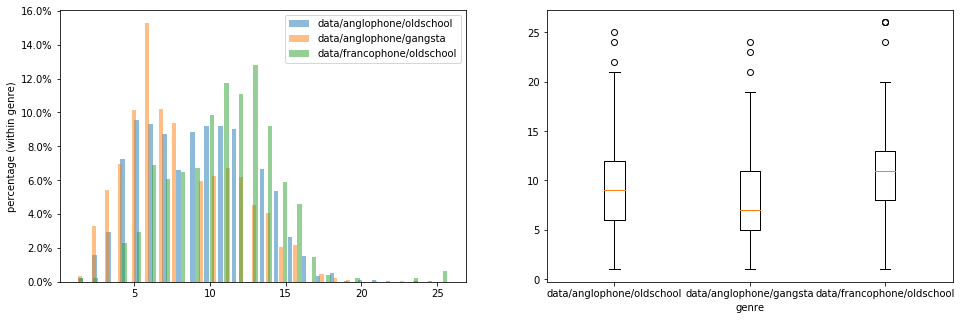

0.9485645933014354
0.8594132029339854
0.9664570230607966
                                                             data/anglophone/oldschool  \
0     [-10, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, ...   
1      [-10, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 10]   
2       [-10, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 10]   
3     [-10, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, ...   
4          [-10, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 10]   
...                                                                                ...   
1667             [-10, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.75, 10]   
1668        [-10, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.5, 0.25, 0.25, 1.25, 10]   
1669        [-10, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.5, 10]   
1670  [-10, 0.25, 0.25, 0.25, 0.25, 0.25, 0

In [10]:
# possible ioi lengths -> to get the markov matrix 

labels = list(humdrum_dict.keys())

for n in [5, 10, 15, 20]:
    print(n)

    transitions_ = {}
    _ioi = []
    from itertools import chain

    for h in humdrum_dict:
        temp = list(map(lambda x: phrase_based(x.ioi_df)['recip'].tolist(),humdrum_dict[h]))
        transitions_[h] = list(chain(*temp))
        _ioi.extend(list(chain(*list(chain(*temp)))))
        print(len(transitions_[h]))
    rep = pd.Series(_ioi).value_counts().tail(n).index.tolist()


    for h in humdrum_dict:

        print(list(compress(transitions_[h], list(map(lambda x: np.any(np.in1d(x, rep)),transitions_[h])))).__len__() / 
        transitions_[h].__len__())
        
selected_transitions = {}
N = 15
start = -10
end = 10
ioi_filter = pd.Series(_ioi).value_counts().tail(N).index.tolist()
ioi = list(set(_ioi) - set(ioi_filter))
ioi.extend([start, end])
ioi.sort()


for h in transitions_:
    selected_transitions[h] = list(compress(transitions_[h], list(~np.array(list(map(lambda x: np.any(np.in1d(x, ioi_filter)),transitions_[h]))))))
    
    
transitions_df = pd.DataFrame.from_dict(selected_transitions, orient='index').transpose()
trans_len_df = pd.DataFrame()
for h in transitions_:
    trans_len_df[h] = transitions_df[h].dropna().apply(lambda x: len(x))
    print(trans_len_df[h].dropna().shape)
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
for i,h in enumerate(transitions_):
    data = trans_len_df[h].dropna()

    ax1.hist(data, weights=np.ones(len(data))/ len(data), alpha=0.5, label=list(humdrum_dict.keys())[i], bins=26, rwidth=0.3)  
    ax3 = plt.boxplot(data, positions=[i]) 


ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax1.legend()

plt.sca(ax2)
plt.xticks(range(0,len(labels)), labels, rotation = 0)

ax1.set_ylabel('percentage (within genre)')

ax2.set_xlabel('genre')
plt.show()


ioi_seq_range = range(4,20)
markov_df = pd.DataFrame()

for h in transitions_:
    markov_df[h] = transitions_df[trans_len_df[h].apply(lambda x: x in ioi_seq_range)][h].apply(lambda x: np.append([start], np.append(x, [end])))
    print(markov_df[h].dropna().shape[0] / trans_len_df[h].dropna().shape[0])

print(markov_df)


print('check ioi notation mapping')

ioi_names = ['start','32','24','16','12','16.','8','8+32','8.','8..','4','4+16','4.','4..','2','2+8','end']
for i, i_ in enumerate(ioi_names):
    print(ioi[i], i_)

## 4. Presentation of final results

In [11]:
def plot_analysis(func, option=0):
    data = {}

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
    

    for i,h in enumerate(humdrum_dict):
        if option == 0:
            data[h] = list(map(func,humdrum_dict[h]))
        elif option == 1:

            data[h] = (sum(list(map(func,humdrum_dict[h])), []))

        ax1.hist(data[h], weights=np.ones(len(data[h])) / len(data[h]), \
             alpha=0.5, label=list(humdrum_dict.keys())[i], rwidth=0.8)  

        ax2.boxplot(data[h], positions=[i]) 

    

    ax1.yaxis.set_major_formatter(PercentFormatter(1))
    ax1.legend()
    
    plt.sca(ax2)
    plt.xticks(range(0,len(labels)), labels, rotation = 0)
    
    ax1.set_ylabel('percentage (within genre)')

    ax2.set_xlabel('genre')

    return fig, (ax1, ax2, ax3)


def plot_entropy_analysis(func):
    data = {}

    fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)
    

    for i,h in enumerate(humdrum_dict):
        data[h] = (sum(list(map(func,humdrum_dict[h])), []))
        axs[i].hist(data[h], weights=np.ones(len(data[h])) / len(data[h]), \
                 alpha=0.5, label=list(humdrum_dict.keys())[i], bins=16) 
        axs[i].yaxis.set_major_formatter(PercentFormatter(1))
        axs[i].set_title('{0} : entropy {1}'.format(labels[i],np.round(entropy(data[h]),3)))
        plt.sca(axs[i])

    return fig, axs


def plot_label(fig, axs, feature, unit, entropy=False):
    if not entropy:
        axs[0].set_title('distribution of ' + feature + '(histogram)')
        axs[0].set_xlabel(unit)
        axs[0].set_xlabel(unit)

        axs[1].set_title('distribution of ' + feature + '(boxplot)')
        axs[1].set_ylabel(unit)
        
    else:
        for i in range(len(humdrum_dict)):
            axs[i].set_xlabel(unit)
            


        plt.suptitle('distribution of ' + feature)


### A. Song-centered analysis
In this part, we have one datapoint for each song. For the moment, we don't have tempos of french songs, which is a necessary feature here. So francophone songs are negleted here.

1. Syllable lengthes

Average length (in seconds) of syllabic onset for each song. In the attribute definition, rests are neglected and not taken into account, so that it can illustrate the accuteness of notes played with short syllables and long rests.

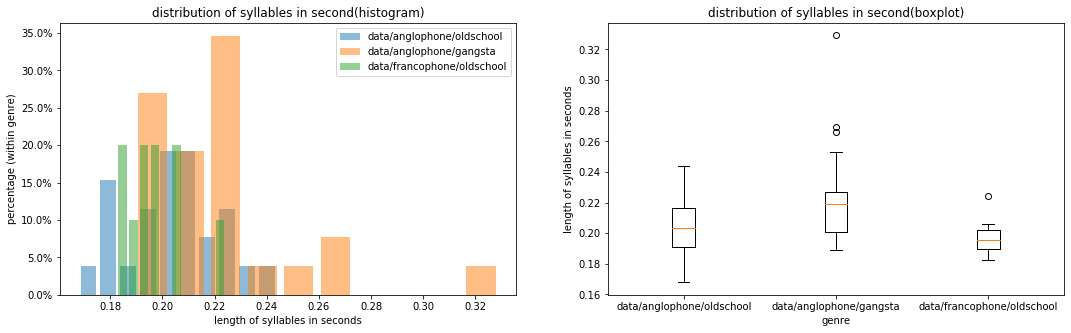

In [45]:
func = lambda x: 1/x.syllabic_rate

feature = 'syllables in second'
unit = 'length of syllables in seconds'


fig, axs = plot_analysis(func)
plot_label(fig, axs, feature, unit)


plt.show() 

Both genres have similar median and interquatile range. Still, syllables in old school raps tends to be shorter than their gangsta counterparts

2. tempo

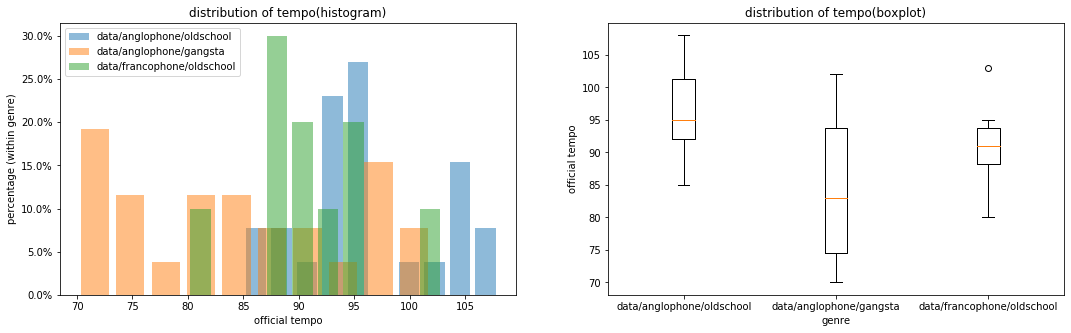

In [46]:
func = lambda x: x.tempo

feature = 'tempo'
unit = 'official tempo'

fig, axs = plot_analysis(func)
plot_label(fig, axs, feature, unit)

plt.show() 


Anglophone oldschool raps have faster tempo that their gangsta counterpart. The distribution is more constrained in the oldschool. On the other hand, tempo of anglophone gangsta is slower, with larger variance.

3. Syllabic density

Average IOI rate for each song. This illustrates the number of syllables per second in each song, which illustrates the 'talktativeness' of each song

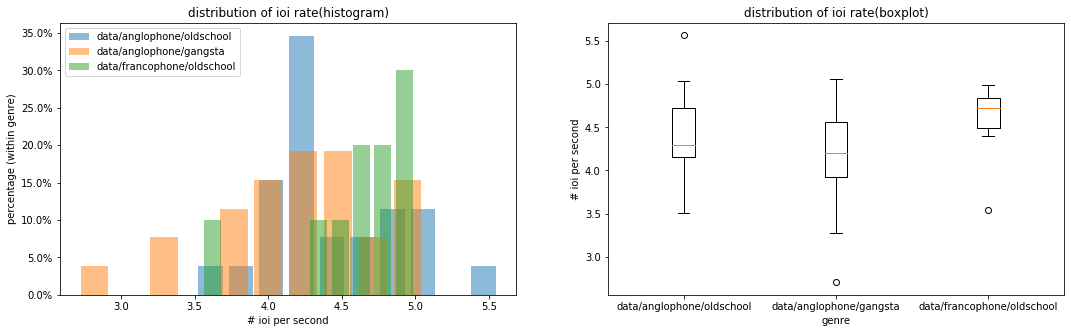

In [47]:
func = lambda x:x.ioi_rate

feature = 'ioi rate'
unit = '# ioi per second'


fig, axs = plot_analysis(func)
plot_label(fig, axs, feature, unit)


plt.show() 

3. Rhyme density

Average rhyme density for each song. Rhyme density is defined as rhyme occurence per measure. (4/4)

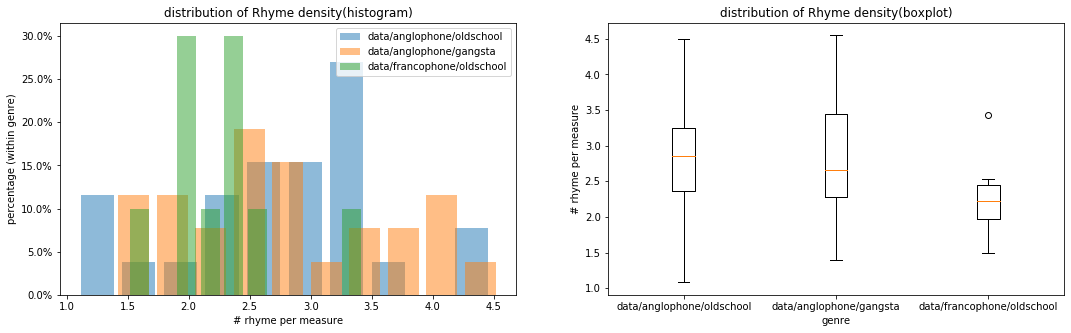

In [48]:
func = lambda x:4*x.rhyme.shape[0]/x.ioi_df.cum_recip.max()

ioidf = humdrum_dict[h][0].ioi_df
ioidf[ioidf['**rhyme']!='.'].shape[0]/ioidf.shape[0]
feature = 'Rhyme density'
unit = '# rhyme per measure'


fig, axs = plot_analysis(func)
plot_label(fig, axs, feature, unit)


plt.show() 

### B. Phrase-centered analysis
In this part, we have one datapoint for each phrase in the set. For example, if there are two songs in a dataset, one with 10 phrases and one with 20 phrases, the total number of datapoints is 30. We conducted our analysis this way because we didn't want to ignore details of various phrases (or 'flows'). In such analysis, however, there is a possiblity that songs with longer phrases being overrepresented.

To interpret the phrase-centered analysis more securely and avoid possible over/under-representation, we start by displaying the distribution of number of phrases per song in each set of data.


1. Number of phrases for each song

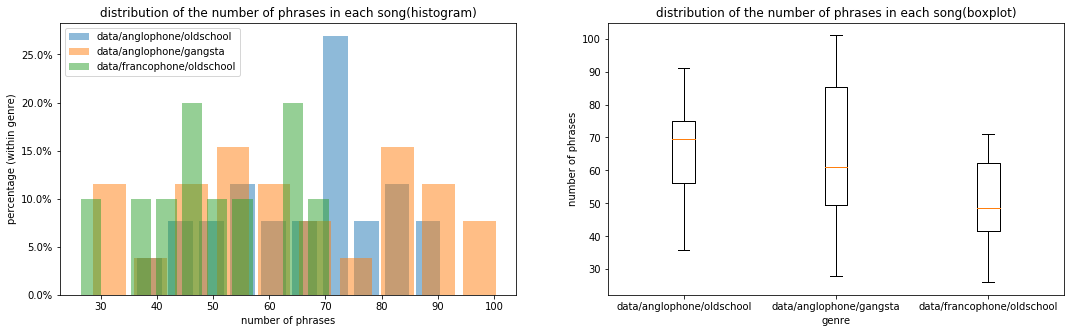

In [52]:
func = lambda x: x.breakpoints.dropna().shape[0]
feature = 'the number of phrases in each song'
unit = 'number of phrases'

fig, axs = plot_analysis(func)
plot_label(fig, axs, feature, unit)

plt.show()


2. Number of syllables per phrase

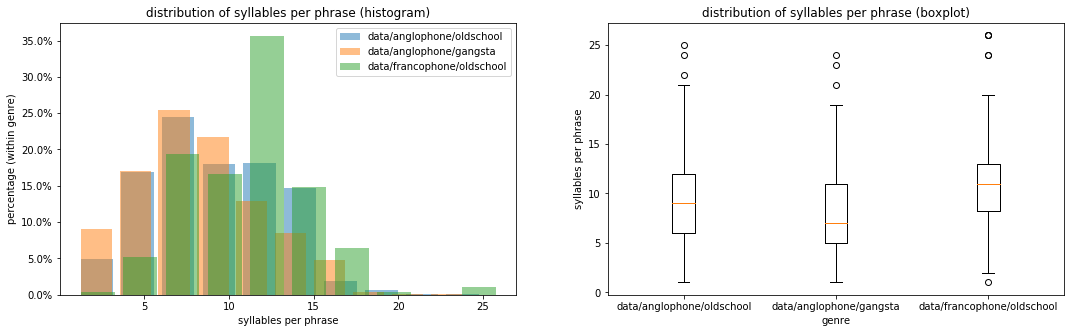

In [16]:
func = lambda x: phrase_based(x.ioi_df)['recip'].apply(lambda y: len(y)).tolist()


feature = 'syllables per phrase '
unit = 'syllables per phrase'


fig, axs = plot_analysis(func, option=1)
plot_label(fig, axs, feature, unit)


plt.show()


3. Beats per phrase: 

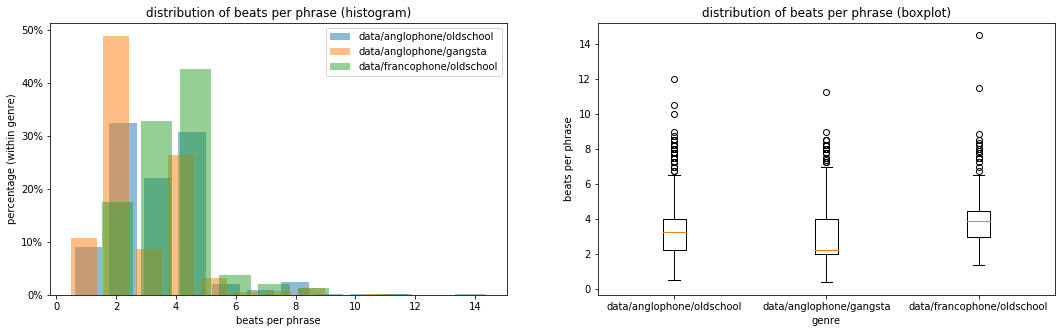

In [17]:
func = lambda x: phrase_based(x.df)['recip'].apply(lambda y: sum(y)).tolist()




feature = 'beats per phrase '
unit = 'beats per phrase'

fig, axs = plot_analysis(func, option=1)
plot_label(fig, axs, feature, unit)
plt.show()

In all cases, peaks appear around the multiples of 2 (half a measure). The distribution differs between three genres. In anglophone gangsta, phrases appears to be quite short, taking only two beats at most of the cases. In anglophone oldschool, beats per phrase is rather evenly distributed between half measure and whole measure. Likewise, francophone oldschool is more concentrated on 4-beats phrase.

### C. Measure-centered Analysis

Compute the metrical position of certain feature (rhyme, phrase starting points, etc) within the song, and aggregate the data. If the distribution is even, we can say that that specific genre has higher degree of freedom in placing rhymes and starting phrases. To get the general idea of 'degree of freedom', we computed entropies of features in each dataset. This is how they characterized phrasing styles of different MCs in MCflow dataset.

1. Starting point of phrases

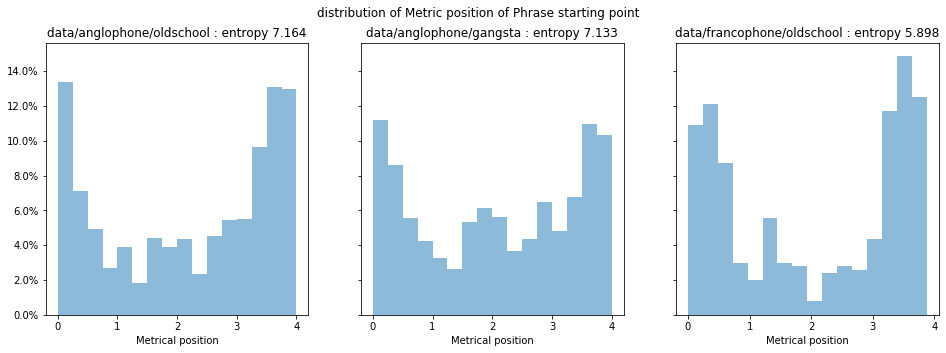

In [54]:
func = lambda x: x.breakpoints.dropna().tolist()

fig, axs = plot_entropy_analysis(func)


feature = 'Metric position of Phrase starting point'
unit = 'Metrical position'


plot_label(fig, axs, feature, unit, entropy=True)
plt.show()

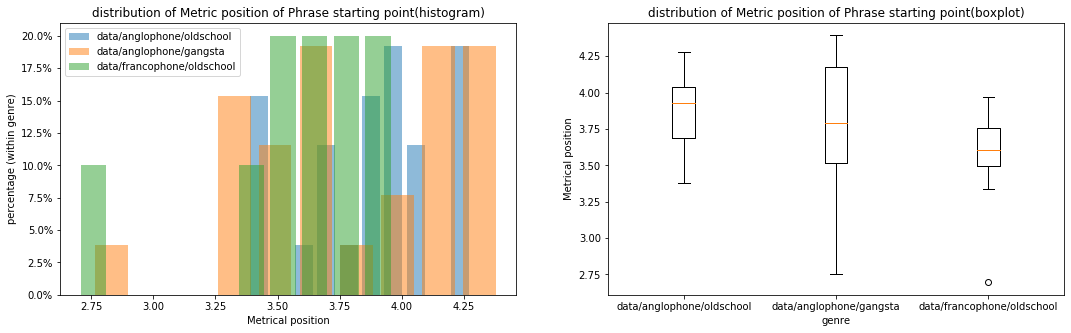

In [59]:
func = lambda x: np.round(entropy(x.breakpoints.dropna().tolist()),3)

fig, axs = plot_analysis(func)


feature = 'Metric position of Phrase starting point'
unit = 'Metrical position'


plot_label(fig, axs, feature, unit)
plt.show()

In all genres, phrases tend to start at the first or last metrical position of measure. 

2. Rhyme positions

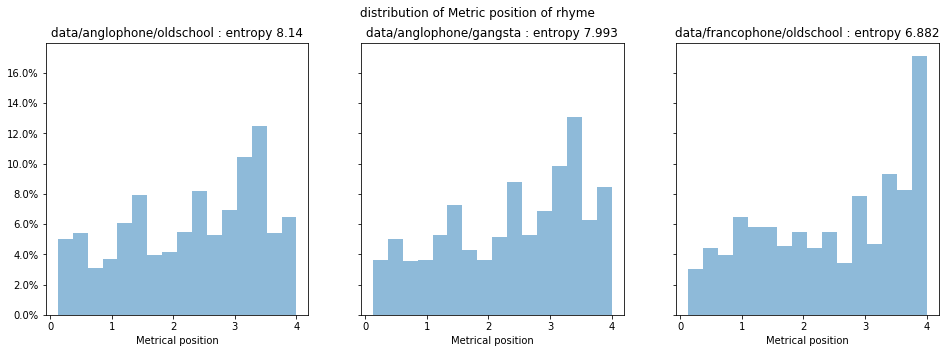

In [57]:
func = lambda x:x.rhyme.tolist()

fig, axs = plot_entropy_analysis(func)


feature = 'Metric position of rhyme'
unit = 'Metrical position'


plot_label(fig, axs, feature, unit, entropy=True)
plt.show()

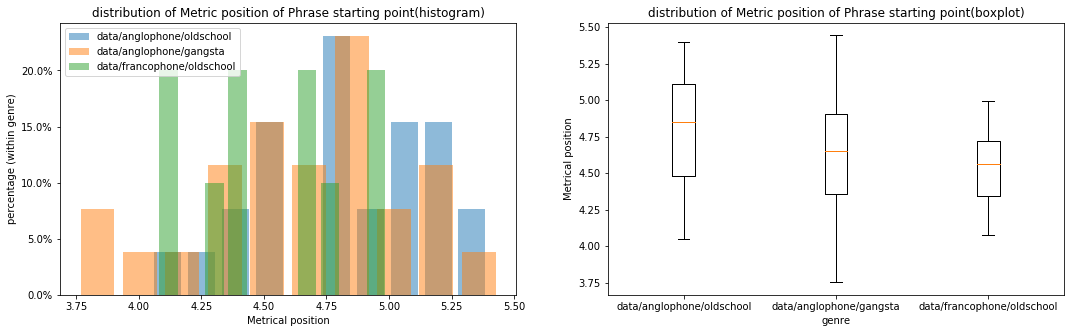

In [58]:
func = lambda x: np.round(entropy(x.rhyme.tolist()),3)

fig, axs = plot_analysis(func)


feature = 'Metric position of Phrase starting point'
unit = 'Metrical position'


plot_label(fig, axs, feature, unit)
plt.show()

In all genres, rhymes tend to occur at the last metrical position of measure, but the entropy is lowest in the french set.

### D. Intra-phrase analysis 

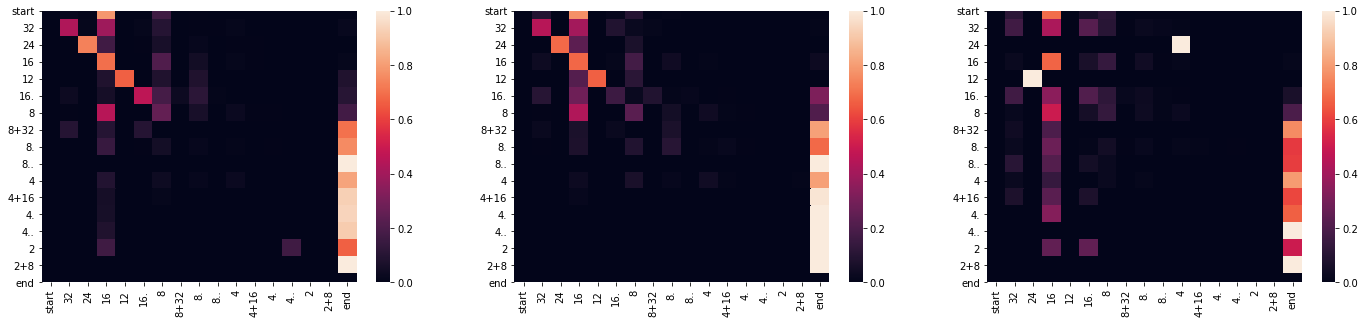

In [22]:

fig, axs = plt.subplots(1, 3, figsize=(24,5))
for pos,h in enumerate(labels):


    markov_list = markov_df[h].dropna().tolist()
    M = np.zeros((len(markov_list), len(ioi),len(ioi)))
    for k, m in enumerate(markov_list):
        T = list(map(lambda x: np.argwhere(np.array(ioi) == x)[0][0],m))
        for (i,j) in zip(T,T[1:]):
            try:
                M[k][i][j] += 1
            except:
                print((k, M.shape[0]), (i, M.shape[1]), (j, M.shape[2]))
                
    M = np.sum(M, axis=0)
    for row in M:
        n = sum(row)
        if n > 0:
            row[:] = [f/sum(row) for f in row]



    probs = M
    sns.heatmap(M, xticklabels=ioi_names, yticklabels=ioi_names, ax=axs[pos])
plt.show()

## 4. Revisiting our hypotheses


### A. US old-school vs US new-school

#### 1. The flow in new-school seems to be more structured and « straight » than that of old-school

- the phrase and sub_phrase in New-School begin and end in a more defined/predictable moment than those in old-school.

- the phrase and sub_phrase in New-School rhyme in a more defined/predictable moment than those in old-school.

- within the phrase, the sequence of IOI is more predictable and concentrated on certain length of IOIs in new-school than in old-school.

#### 2. The new-school songs are more sluggish than the old-school songs. 

- Tempos of new-school songs are slower that those of old-school songs.

- Syllabic rates of new-school songs are smaller that those of old-school songs.

- Length of syllables (in seconds) of new-school songs are shorter that those of old-school songs.

### B. US vs French
#### 1. The French raps are more deterministic than the US raps. 

- Rhyme density is denser in US raps than in French raps.
- Rhyme position is more diverse in US raps than in French raps.

#### 2. The French old-school raps are more similar to the Amerian old-school raps, than the Amerian new-school raps.
- Aggregate all the features mentioned above. 

## 5. Discussions and Interpretation

So far we have found out following differences: 

- Anglophone oldschool : accute, faster tempo, generally shows smaller variance in the feature we looked at. Longer phrases.
- Anglophone Gangsta: obtuse, slower tempo, generally shows larger variance in the feature we looked at. Very short phrases.
- (Francophone oldschool: not enough datapoints)

The most significant difference found here is the 'standard' length of phrase (flow) in terms of beats. Seeing the distribution of the length of flow, we can reasonably choose the 'representative flow' of each genre, by filtering through the beat length, which will be useful in later analysis.

However, even though these are good illustrations of different genres of rap music in general, we were not able to conduct any 'deeper' analysis on flows and discovering 'norm flow' for each genre. This is largely due to the result of analysis C. Initially, we aimed to discover different distributions in rhyme positions and phrase string points in different genres, but it turned out that there is no significant difference.

This leads us to conduct more detailed analysis on each phrase(flow). How are IOIs distributed within a flow? What can be the possible rhyme position of a following flow? How frequent such flow appear throughout the song or genre?
One of the obvious ways to conduct the abovementioned points is to statically analyze the sequence of syllabic onsets (or IOIs) through Markov model.

Besides, we can select 'representative songs' per each genre, visualize their flow by marking different lengths of syllabic onsets (or IOIS) within a flow. The example is just below:

In this figure, all the syllabic onsets and rests are marked in different color, relative to the reference beat. Each bar indicates each flow.
Here, the figure intuitively illustrates that the majority of its flows are 4-beat or 2-beat long, which reflects the results of part 3.B.3. Moreover, the internal distribution of syllabic onsets is very regular as well.


Through such final analysis we aim to:
- clarify general difference between anglophone oldschool/anglophone gangsta/francophone oldschool rap
- show (statistically) standard flow of each genre.
- state the inter-genre or inter-cultural (or inter-linguistical) influence on rap flow: Is francophone oldschool rap more similar to anglophone oldschool rap, or anglophone gangsta rap, or neither?







- markov analysis on rhyme positions within phrase

0.1334355828220859

In [37]:
ioidf

,**recip,**break,**rhyme,**lyrics,**verse,pickup,cum_recip,breakpoints
0,0.25,4,.,Au,1.0,False,2.5,2.25
1,0.25,.,.,dé-,1.0,False,2.75,NaN
2,0.25,.,.,-but,1.0,False,3,NaN
3,0.25,.,.,des,1.0,False,3.25,NaN
4,0.25,.,.,a-,1.0,False,3.5,NaN
...,...,...,...,...,...,...,...,...
647,0.25,.,.,-dre,3.0,False,231,NaN
648,0.25,.,.,des,3.0,False,231.25,NaN
649,0.25,.,.,fill-,3.0,False,231.5,NaN
650,0.25,.,.,-es,3.0,False,231.75,NaN
